<a href="https://colab.research.google.com/github/mloachamin/MyWeb/blob/main/Reconocimiento_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconocimiento de imagenes
Mauricio Loachamín

In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
width = 1028
height = 1028

# Cargar imagen con OpenCV
img = cv2.imread('cocina3.png')
# Redimensionar imagen
inp = cv2.resize(img,(width, height))

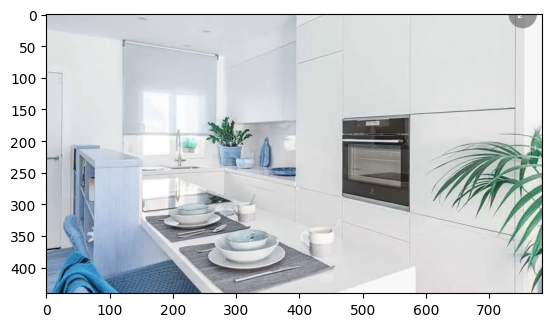

In [ ]:
# ver imagen inicial
plt.imshow(img)

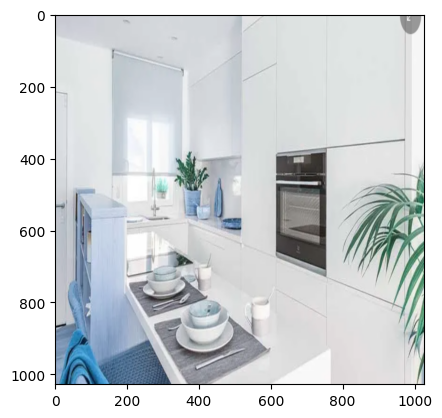

In [ ]:
# ver imagen redimensionadad
plt.imshow(inp)

In [ ]:
# convertri img a RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

# segunda conversión
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

# Add dims a rgb
rgb_tensor = tf.expand_dims(rgb_tensor, 0)

In [ ]:
# Cargamos modelos y etiquetas

import tensorflow_hub as hub
import pandas as pd

# Loading model directly from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

# Loading csv with labels of classes
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']


In [ ]:
# Ahora realizamos la predicción
# Creating prediction
boxes, scores, classes, num_detections = detector(rgb_tensor)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

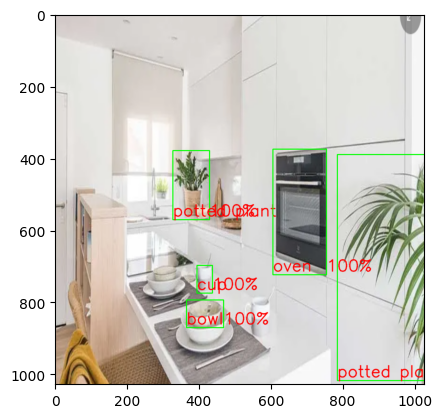

In [ ]:
# ver imagen con detección
plt.imshow(img_boxes)